In [ ]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
def crop(img, x, y, w, h):
    return img[y:y+h, x:x+w]

/tmp/ipykernel_132018/1558839837.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


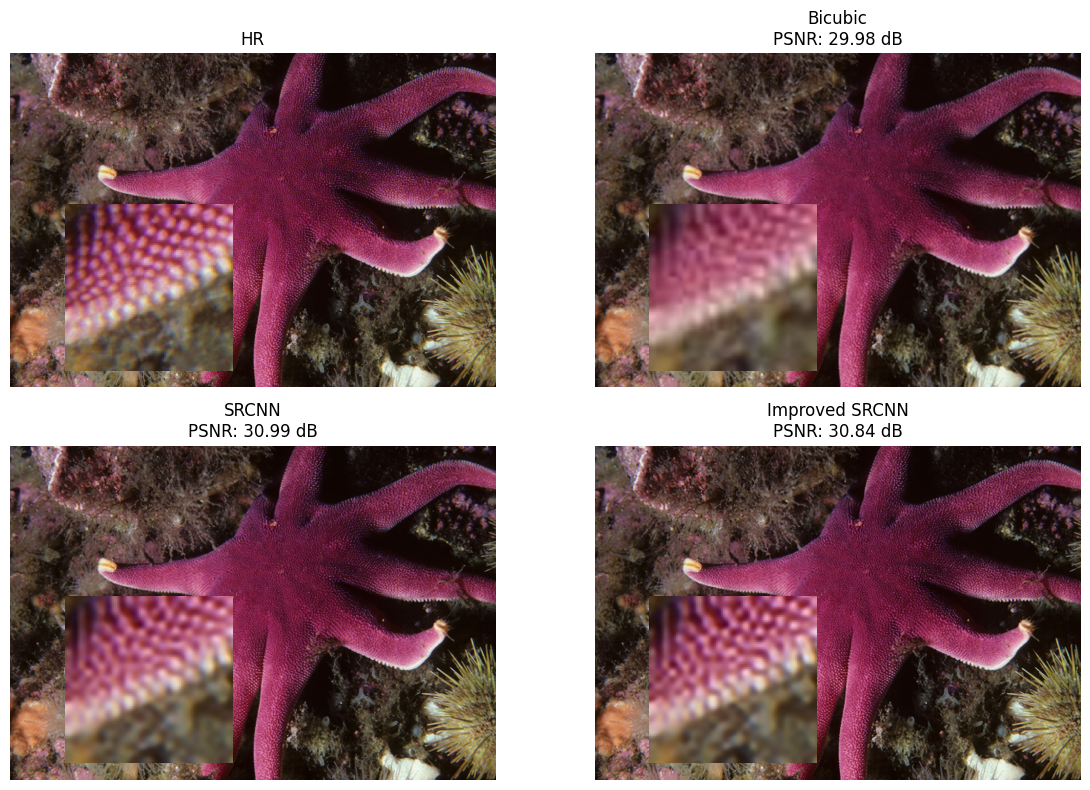

In [ ]:
def crop(img, x, y, w, h):
    return img[y:y+h, x:x+w]

images = {
    "HR": "dataset/DIV2K_train_HR/0001.png",
    "Bicubic": "result/bicubic_output.jpg",
    "SRCNN": "result/output_base_super_resolution.png",
    "Improved SRCNN": "result/output_super_resolution.png",
}

psnr_scores = {
    "HR": None,
    "Bicubic": 29.98,
    "SRCNN": 30.99,
    "Improved SRCNN": 30.84,
}

hr_img = cv2.imread(images["HR"], cv2.IMREAD_COLOR)
hr_h, hr_w = hr_img.shape[:2]

images_arr = {}
for name, path in images.items():
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is None:
        raise FileNotFoundError(f"Image not found: {path}")
    img = cv2.resize(img, (hr_w, hr_h), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images_arr[name] = img

# zoom area
x, y, w, h = 300, 900, 100, 100

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, (name, img) in zip(axes, images_arr.items()):
    ax.imshow(img)
    ax.axis("off")
    title = name
    if psnr_scores[name] is not None:
        title += f"\nPSNR: {psnr_scores[name]:.2f} dB"
    ax.set_title(title, fontsize=12)

    rect = plt.Rectangle((x, y), w, h, edgecolor="red", facecolor="none", linewidth=1)
    ax.add_patch(rect)

    axins = inset_axes(ax, width="50%", height="50%", loc="lower left", borderpad=1.2)
    axins.imshow(crop(img, x, y, w, h))
    axins.axis("off")
    for spine in axins.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor("black")
        spine.set_linewidth(4)
        spine.set_zorder(10)
    axins.patch.set_edgecolor("black")
    axins.patch.set_linewidth(4)
    axins.patch.set_alpha(1)

plt.tight_layout()
plt.show()